#Importer les Biblio et Dataset

In [86]:
!pip install imblearn

Import les Bibliotiques:

 -> Pandas

 ->NumPy

 ->Matplotlib

 ->Seaborn

 ->Scipy

 ->Sklearn

 ->Warnings

In [87]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest, norm,stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

Import la dataset (Dataset_Fraude_Bancaire_complete.csv):

In [88]:
df = pd.read_csv('Dataset_Fraude_Bancaire_complete.csv')
#Affiche les 5 lignes premiers
df.head()

,transaction_id,client_id,date,heure,montant,devise,type_transaction,lieu,canal,moyen_paiement,categorie_commerce,device_utilise,score_risque_client,is_fraud
0,T000001,C8270,01/07/2025,22:38:02,9662.17,USD,paiement en ligne,Fès,carte,Visa,électronique,Android,5,0
1,T000002,C1860,01/07/2025,09:09:18,7622.33,MAD,retrait,Tanger,application mobile,Visa,voyage,ATM,9,0
2,T000003,C6390,01/07/2025,13:33:32,9510.19,MAD,retrait,Casablanca,application mobile,Visa,voyage,ATM,9,0
3,T000004,C6191,01/07/2025,22:54:27,7040.28,MAD,virement,Casablanca,guichet,Amex,santé,Android,6,0
4,T000005,C6734,01/07/2025,17:06:28,3015.62,MAD,virement,Fès,guichet,Amex,électronique,iOS,1,0


#Analyse des données:

Savoir le nombre des lines et des colonnes

In [89]:
#Le size de DataFram:
print(f"\t==Le size de DataFram est: {df.shape}")

	==Le size de DataFram est: (1000, 14)


Savoir les informations des colonnes

In [90]:
#Affiches les informations de df:
print("\t==Les informations de DataFram:")
df.info()

	==Les informations de DataFram:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       1000 non-null   object 
 1   client_id            1000 non-null   object 
 2   date                 1000 non-null   object 
 3   heure                1000 non-null   object 
 4   montant              950 non-null    float64
 5   devise               950 non-null    object 
 6   type_transaction     1000 non-null   object 
 7   lieu                 948 non-null    object 
 8   canal                1000 non-null   object 
 9   moyen_paiement       950 non-null    object 
 10  categorie_commerce   1000 non-null   object 
 11  device_utilise       1000 non-null   object 
 12  score_risque_client  1000 non-null   int64  
 13  is_fraud             1000 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 109.5+

Savoir les valeurs Null

In [91]:
print('\t==Les colonnes qui ont des valeur null:')
print(df.isnull().sum())

	==Les colonnes qui ont des valeur null:
transaction_id          0
client_id               0
date                    0
heure                   0
montant                50
devise                 50
type_transaction        0
lieu                   52
canal                   0
moyen_paiement         50
categorie_commerce      0
device_utilise          0
score_risque_client     0
is_fraud                0
dtype: int64


Savoir les statistique

In [92]:
print("\t==Les statistique de données:")
df.describe(include='all')

	==Les statistique de données:


,transaction_id,client_id,date,heure,montant,devise,type_transaction,lieu,canal,moyen_paiement,categorie_commerce,device_utilise,score_risque_client,is_fraud
count,1000,1000,1000,1000,950.000000,950,1000,948,1000,950,1000,1000,1000.000000,1000.000000
unique,1000,947,93,993,NaN,3,3,5,4,4,5,4,NaN,NaN
top,T001000,C7949,01/07/2025,09:24:01,NaN,MAD,paiement en ligne,Casablanca,en ligne,Visa,voyage,ATM,NaN,NaN
freq,1,3,11,2,NaN,592,518,261,267,273,215,270,NaN,NaN
mean,NaN,NaN,NaN,NaN,5019.591295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.468000,0.050000
std,NaN,NaN,NaN,NaN,2883.159950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.862371,0.218054
min,NaN,NaN,NaN,NaN,50.120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,2511.585000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000
50%,NaN,NaN,NaN,NaN,5064.445000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000,0.000000
75%,NaN,NaN,NaN,NaN,7548.547500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,0.000000


Analyser la distrébution de variable cible

In [93]:
#
tagert = "is_fraud"
maxi = df[df[tagert]==0]
mini = df[df[tagert]==1]
#Affiche la distrébution de variable cible
print("=Les observation normale sont: ",maxi.shape[0],"\n=Porsentage: ",maxi.shape[0]/1000*100,"%" )
print("+Les observation fraud sont: ",mini.shape[0],"\n+Porsentage: ",mini.shape[0]/1000 *100,"%")

=Les observation normale sont:  950 
=Porsentage:  95.0 %
+Les observation fraud sont:  50 
+Porsentage:  5.0 %


<Axes: xlabel='is_fraud', ylabel='count'>

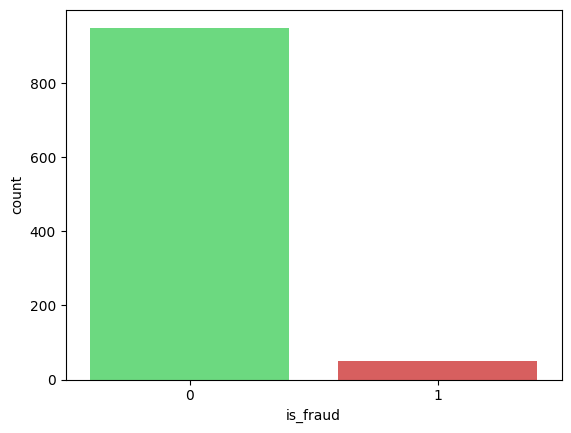

In [94]:
sns.countplot(x=tagert , data=df, palette=['#5AEB74','#EB4B4B'])

#Divise les colonne  et Créer les fcts pour traiter

In [95]:
#Les colonnes numériques:
col_num = df.select_dtypes(include=['int64','float64']).copy()

#Les colonnes catégorique
col_cat = df.select_dtypes(include=['object', 'string']).copy()
#Separer les colonne temporelle:
col_temp = col_cat.select_dtypes(include=['datetime64']).copy()
for col in col_cat.columns:
        if 'date' in col.lower() or 'heure' in col.lower():
            col_temp[col] = col_cat[col]
            col_cat.drop(columns=col, inplace=True)

In [96]:
col_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   transaction_id      1000 non-null   object
 1   client_id           1000 non-null   object
 2   devise              950 non-null    object
 3   type_transaction    1000 non-null   object
 4   lieu                948 non-null    object
 5   canal               1000 non-null   object
 6   moyen_paiement      950 non-null    object
 7   categorie_commerce  1000 non-null   object
 8   device_utilise      1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


#Proportion des valeurs catégorielles

In [97]:
col_cat.drop(columns=['transaction_id','client_id'],inplace=True)


In [98]:
# Dictionnaire global de NaN
nan_dict = {col: df[col].isna().sum() for col in df.columns}
# Proportion des valeurs catégorielles
unique_cat_ratio = {}
for col in col_cat:
    unique_cat_ratio[col] = df[col].value_counts(normalize=True, dropna=False).to_dict()

for col, ratio_dict in unique_cat_ratio.items():
    print(f"{col} : {ratio_dict}")

devise : {'MAD': 0.592, 'EUR': 0.269, 'USD': 0.089, nan: 0.05}
type_transaction : {'paiement en ligne': 0.518, 'retrait': 0.28, 'virement': 0.202}
lieu : {'Casablanca': 0.261, 'Fès': 0.209, 'Rabat': 0.187, 'Tanger': 0.149, 'Marrakech': 0.142, nan: 0.052}
canal : {'en ligne': 0.267, 'guichet': 0.256, 'carte': 0.241, 'application mobile': 0.236}
moyen_paiement : {'Visa': 0.273, 'Amex': 0.235, 'Cash': 0.226, 'MasterCard': 0.216, nan: 0.05}
categorie_commerce : {'voyage': 0.215, 'santé': 0.207, 'électronique': 0.201, 'mode': 0.191, 'alimentaire': 0.186}
device_utilise : {'ATM': 0.27, 'Web': 0.256, 'iOS': 0.247, 'Android': 0.227}


Nettoyage

#Supression

In [99]:
threshold_nan = 3       # % pour alerter / supprimer
dominant_threshold = 0.1  # pour valeur dominante

In [100]:
# --- Fonction de suppression si peu de NaN ---
def suppression():
    for col in df.columns:
        nb_nan = nan_dict[col]
        perc_nan = nb_nan / df.shape[0] * 100
        if perc_nan < threshold_nan and nb_nan > 0:
            print(f"Suppression NaN <{threshold_nan}% en colonne : {col}")
            df.dropna(subset=[col], inplace=True)

#Imputation numérique

In [101]:
# --- Fonction d'imputation ---
def imputationNum():
    # Numérique
    for col in col_num.columns:
        nb_nan = nan_dict[col]
        perc_nan = nb_nan / df.shape[0] * 100
        if perc_nan > threshold_nan:
            col_data = col_num[col]
            stat, p = stats.normaltest(col_data)
            mean = col_data.mean()
            if p > 0.05:
                print(f"Imputation NaN <{threshold_nan}% en colonne : {col} -> moyenne")
                col_num[col].fillna(mean, inplace=True)
            else:
                print(f"Imputation NaN <{threshold_nan}% en colonne : {col} -> median")
                col_num[col].fillna(col_data.median(), inplace=True)

#Imputation Catégorique

In [102]:
def imputationCat():
    # Catégorique
  for col in col_cat.columns:
        nb_nan = nan_dict[col]                     # nombre de NaN dans la colonne
        perc_nan = nb_nan / df.shape[0] * 100     # % de NaN
        if perc_nan > threshold_nan:              # si % de NaN > seuil global
            top_value = max(unique_cat_ratio[col], key=unique_cat_ratio[col].get)  # modalité dominante
            top_ratio = unique_cat_ratio[col][top_value]   # ratio de cette modalité
            if top_ratio > dominant_threshold:
                print(f"Imputation NaN <{threshold_nan}% en colonne : {col} -> valeur freq")
                # La modalité dominante est assez fréquente → on remplace NaN par cette valeur
                col_cat[col].fillna(df[col].mode()[0], inplace=True)
            else:
                print(f"Imputation NaN <{threshold_nan}% en colonne : {col} -> valeur 'Unknown'")
                # La modalité dominante n'est pas suffisamment forte → remplacer par 'Unknown'
                col_cat[col].fillna('Unknown', inplace=True)


#Imputation temp

In [103]:
def imputationTemp(df):
  nan_dict = {col: df[col].isna().sum() for col in df.columns}
  for col in col_temp:
      nb_nan = nan_dict[col]
      perc_nan = nb_nan / df.shape[0] * 100
      if perc_nan > threshold_nan:
        print(f"Imputation NaN <{threshold_nan}% en colonne : {col} -> interpolate")
        df[col] = df[col].interpolate(method='linear')

#colonne numérique

In [104]:

#supperimer le variable cible :
if tagert in col_num.columns:
    col_num.drop(tagert,axis=1,inplace=True)
#voir les statistique :
col_num.describe()


,montant,score_risque_client
count,950.000000,1000.000000
mean,5019.591295,5.468000
std,2883.159950,2.862371
min,50.120000,1.000000
25%,2511.585000,3.000000
50%,5064.445000,5.500000
75%,7548.547500,8.000000
max,9988.980000,10.000000


Créer les fct qui choix si on faire un stadarisation ou un normalisation

| Situation                                                  | Méthode recommandée                           | Type de données            |
| ---------------------------------------------------------- | --------------------------------------------- | -------------------------- |
| Distribution normale ou proche normale                     | **Standardisation** (moyenne 0, écart-type 1) | **float ou int**           |
| Plage spécifique nécessaire ou valeurs non normales        | **Normalisation** (Min-Max, [0,1])            | **float ou int**           |
| Présence d’outliers importants                             | **Standardisation préférable**                | **float ou int**           |
| Pour certains modèles comme arbres, Random Forest, XGBoost | **Souvent pas besoin de scaler**              | Peut être **float ou int** |

In [105]:
def choixStdNor():
  results = {}
   # Test de normalité pour chaque colonne
  for col in col_num.columns:
        if col_num[col].dtype == 'int64':  # éviter les colonnes discrètes
            continue
        stat, p = stats.normaltest(col_num[col])
        results[col] = {'statistic': stat, 'p_value': p, 'is_normal': p > 0.05}

    # Application du bon type de normalisation
  for col, result in results.items():
     if col_num[col].dtype == 'int64':  # éviter les colonnes discrètes
            continue
     else:
        if result['is_normal']:
            print(f'✅ Colonne "{col}" suit une loi normale → Standardisation')
            scaler = StandardScaler()
            col_num[col] = scaler.fit_transform(col_num[[col]])
        else:
            print(f'⚠️ Colonne "{col}" ne suit pas une loi normale → Normalisation MinMax')
            scaler = MinMaxScaler()
            col_num[col] = scaler.fit_transform(col_num[[col]])

#transforme les colonnes temporelles

In [106]:
def transformer_temps():
    """
    Transforme les colonnes temporelles (date/heure) en caractéristiques dérivées.
    """
    for col in col_temp.columns:
        if col not in df.columns:
            print(f"⚠️ La colonne '{col}' n'existe pas dans le DataFrame.")
            continue

        col_temp[col] = pd.to_datetime(col_temp[col], errors='coerce')

        # --- Colonne contenant "date" ---
        if 'date' in col.lower():
            col_temp[f'{col}_jour'] = col_temp[col].dt.day
            col_temp[f'{col}_mois'] = col_temp[col].dt.month
            col_temp[f'{col}_annee'] = col_temp[col].dt.year
            col_temp[f'{col}_jour_semaine'] = col_temp[col].dt.dayofweek
            col_temp[f'{col}_weekend'] = (col_temp[col].dt.dayofweek >= 5).astype(int)
            col_temp.drop(columns=[col], inplace=True)
            print('Bien passe')

        # --- Colonne contenant "heure" ---
        elif 'heure' in col.lower():
            col_temp[f'{col}_heure'] = col_temp[col].dt.hour
            col_temp[f'{col}_minute'] = col_temp[col].dt.minute
            col_temp[f'{col}_seconde'] = col_temp[col].dt.second
            print('Bien passe')

            # Déterminer la période de la journée
            def get_period(hour):
                if 6 <= hour < 12:
                    return 1  # matin
                elif 12 <= hour < 18:
                    return 2  # après-midi
                elif 18 <= hour < 23:
                    return 3  # soir
                else:
                    return 4  # nuit

            col_temp[f'{col}_periode'] = col_temp[f'{col}_heure'].apply(get_period)
            col_temp.drop(columns=[col], inplace=True)

        else:
            print(f"⚠️ La colonne '{col}' n'est pas reconnue comme date/heure.")




#Les colonnes nominalle

In [107]:
def choixEncodage():
    """
    Encode automatiquement les colonnes catégorielles :
    - Binaire si n_unique == 2
    - One-Hot si n_unique <= OneHot_threshold
    - Frequency si n_unique > OneHot_threshold

    Args:
        col_cat : DataFrame des colonnes catégorielles
        unique_cat_ratio : dict[col] = {valeur: ratio}
        OneHot_threshold : seuil max de modalités pour One-Hot
    Returns:
        df_binaire_list, df_onehot_list, df_freq_list
    """
    OneHot_threshold=10

    df_binaire_list = pd.DataFrame()
    df_onehot_list = pd.DataFrame()
    df_freq_list = pd.DataFrame()

    for col in col_cat.columns:
        n_unique = len(unique_cat_ratio[col])

        if n_unique == 2:
            # Binaire Encoding
            print(f'{col} -> Binaire')
            vals = list(unique_cat_ratio[col].keys())
            df_binaire_list[col] = col_cat[col].map({vals[0]: 0, vals[1]: 1})

        elif n_unique <= OneHot_threshold:
            # One-Hot Encoding
            print(f'{col} -> One-Hot')
            dummies = pd.get_dummies(col_cat[col], prefix=col, drop_first=False)
            df_onehot_list = pd.concat([df_onehot_list, dummies], axis=1)

        else:
            # Frequency Encoding
            print(f'{col} -> Frequency')
            freq = col_cat[col].value_counts() / len(col_cat)
            df_freq_list[col] = col_cat[col].map(freq)

    return df_binaire_list, df_onehot_list, df_freq_list


#Preproccesing de DATA

Nettoyage:

In [108]:
#Sppression de 30% de Données null
suppression()
#Imputation de données numérique
imputationNum()
#Imputation de données catégorique
imputationCat()
#Imputation de données temporelle:
imputationTemp(col_temp)

Imputation NaN <3% en colonne : montant -> median
Imputation NaN <3% en colonne : devise -> valeur freq
Imputation NaN <3% en colonne : lieu -> valeur freq
Imputation NaN <3% en colonne : moyen_paiement -> valeur freq


transforme les colonne Temporelle

In [109]:
transformer_temps()
#Imputation de données temporelle:
imputationTemp(col_temp)

Bien passe
Bien passe
Imputation NaN <3% en colonne : date_jour -> interpolate
Imputation NaN <3% en colonne : date_mois -> interpolate
Imputation NaN <3% en colonne : date_annee -> interpolate
Imputation NaN <3% en colonne : date_jour_semaine -> interpolate


Standarisation et Normalisation

In [110]:
choixStdNor()

⚠️ Colonne "montant" ne suit pas une loi normale → Normalisation MinMax


In [111]:
col_num.head()

,montant,score_risque_client
0,0.967118,5
1,0.761879,9
2,0.951826,9
3,0.703316,6
4,0.298374,1


Encodage ordinale

In [112]:
df_binaire_list, df_onehot_list, df_freq_list = choixEncodage()

devise -> One-Hot
type_transaction -> One-Hot
lieu -> One-Hot
canal -> One-Hot
moyen_paiement -> One-Hot
categorie_commerce -> One-Hot
device_utilise -> One-Hot


In [113]:
final = pd.DataFrame()
def ajouter(df):
  for col in df.columns:
    final[col]= df[col]
    print(f'{col} à ajouté')

In [114]:
ajouter(col_num)
ajouter(col_temp)
ajouter(df_binaire_list)
ajouter(df_onehot_list)
ajouter(df_freq_list)
final[tagert] = df[tagert]

montant à ajouté
score_risque_client à ajouté
date_jour à ajouté
date_mois à ajouté
date_annee à ajouté
date_jour_semaine à ajouté
date_weekend à ajouté
heure_heure à ajouté
heure_minute à ajouté
heure_seconde à ajouté
heure_periode à ajouté
devise_EUR à ajouté
devise_MAD à ajouté
devise_USD à ajouté
type_transaction_paiement en ligne à ajouté
type_transaction_retrait à ajouté
type_transaction_virement à ajouté
lieu_Casablanca à ajouté
lieu_Fès à ajouté
lieu_Marrakech à ajouté
lieu_Rabat à ajouté
lieu_Tanger à ajouté
canal_application mobile à ajouté
canal_carte à ajouté
canal_en ligne à ajouté
canal_guichet à ajouté
moyen_paiement_Amex à ajouté
moyen_paiement_Cash à ajouté
moyen_paiement_MasterCard à ajouté
moyen_paiement_Visa à ajouté
categorie_commerce_alimentaire à ajouté
categorie_commerce_mode à ajouté
categorie_commerce_santé à ajouté
categorie_commerce_voyage à ajouté
categorie_commerce_électronique à ajouté
device_utilise_ATM à ajouté
device_utilise_Android à ajouté
device_uti

In [115]:
final.head()

,montant,score_risque_client,date_jour,date_mois,date_annee,date_jour_semaine,date_weekend,heure_heure,heure_minute,heure_seconde,...,categorie_commerce_alimentaire,categorie_commerce_mode,categorie_commerce_santé,categorie_commerce_voyage,categorie_commerce_électronique,device_utilise_ATM,device_utilise_Android,device_utilise_Web,device_utilise_iOS,is_fraud
0,0.967118,5,7.0,1.0,2025.0,1.0,0,22,38,2,...,False,False,False,False,True,False,True,False,False,0
1,0.761879,9,7.0,1.0,2025.0,1.0,0,9,9,18,...,False,False,False,True,False,True,False,False,False,0
2,0.951826,9,7.0,1.0,2025.0,1.0,0,13,33,32,...,False,False,False,True,False,True,False,False,False,0
3,0.703316,6,7.0,1.0,2025.0,1.0,0,22,54,27,...,False,False,True,False,False,False,True,False,False,0
4,0.298374,1,7.0,1.0,2025.0,1.0,0,17,6,28,...,False,False,False,False,True,False,False,False,True,0


In [116]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   montant                             1000 non-null   float64
 1   score_risque_client                 1000 non-null   int64  
 2   date_jour                           1000 non-null   float64
 3   date_mois                           1000 non-null   float64
 4   date_annee                          1000 non-null   float64
 5   date_jour_semaine                   1000 non-null   float64
 6   date_weekend                        1000 non-null   int64  
 7   heure_heure                         1000 non-null   int32  
 8   heure_minute                        1000 non-null   int32  
 9   heure_seconde                       1000 non-null   int32  
 10  heure_periode                       1000 non-null   int64  
 11  devise_EUR                          1000 non

Feature selection

In [117]:
def feature_selection(df, seuil=0.0):
    """
    Supprime les colonnes dont la corrélation avec la variable cible est <= seuil.
    Affiche pour chaque colonne sa corrélation avant suppression.

    Args:
        df : pd.DataFrame - DataFrame contenant features et target

        seuil : float - seuil minimal de corrélation (colonnes avec corr <= seuil sont supprimées)

    Returns:
        df_filtered : pd.DataFrame - DataFrame après suppression des colonnes
        cols_removed : list - liste des colonnes supprimées
    """
    if tagert not in df.columns:
        raise ValueError(f"Variable cible '{tagert}' non trouvée dans le DataFrame")

    corr_with_tagert = df.corr()[tagert]

    cols_to_drop = []

    print(f"\nCorrélations avec la variable cible '{tagert}' :")
    print("-"*50)

    for col, corr_val in corr_with_tagert.items():
        if col == tagert:
            continue
        print(f"{col:25s} → corrélation = {corr_val:.3f} ; seuil = {seuil}")
        if corr_val <= seuil:
            cols_to_drop.append(col)

    # Supprimer les colonnes
    df_filtered = df.drop(columns=cols_to_drop)

    print("\nColonnes supprimées :")
    print(cols_to_drop)

    return df_filtered, cols_to_drop


In [118]:
final = feature_selection(final, seuil=0.0)[0]



Corrélations avec la variable cible 'is_fraud' :
--------------------------------------------------
montant                   → corrélation = 0.020 ; seuil = 0.0
score_risque_client       → corrélation = -0.012 ; seuil = 0.0
date_jour                 → corrélation = -0.009 ; seuil = 0.0
date_mois                 → corrélation = -0.012 ; seuil = 0.0
date_annee                → corrélation = nan ; seuil = 0.0
date_jour_semaine         → corrélation = 0.003 ; seuil = 0.0
date_weekend              → corrélation = -0.028 ; seuil = 0.0
heure_heure               → corrélation = 0.014 ; seuil = 0.0
heure_minute              → corrélation = -0.001 ; seuil = 0.0
heure_seconde             → corrélation = -0.024 ; seuil = 0.0
heure_periode             → corrélation = -0.022 ; seuil = 0.0
devise_EUR                → corrélation = -0.025 ; seuil = 0.0
devise_MAD                → corrélation = -0.001 ; seuil = 0.0
devise_USD                → corrélation = 0.041 ; seuil = 0.0
type_transaction_paiemen

In [119]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   montant                          1000 non-null   float64
 1   date_annee                       1000 non-null   float64
 2   date_jour_semaine                1000 non-null   float64
 3   heure_heure                      1000 non-null   int32  
 4   devise_USD                       1000 non-null   bool   
 5   type_transaction_retrait         1000 non-null   bool   
 6   type_transaction_virement        1000 non-null   bool   
 7   lieu_Marrakech                   1000 non-null   bool   
 8   lieu_Rabat                       1000 non-null   bool   
 9   lieu_Tanger                      1000 non-null   bool   
 10  canal_en ligne                   1000 non-null   bool   
 11  canal_guichet                    1000 non-null   bool   
 12  moyen_paiement_Master

#Algo KNN

Prepare data

In [120]:
x = final.drop(columns=[tagert])
y = final[tagert]

In [121]:
rm = RandomOverSampler()
x_rm ,y_rm = rm.fit_resample(x,y)
print('old data setshape : {}'.format(Counter(y)))
print('new data setshape : {}'.format(Counter(y_rm)))

old data setshape : Counter({0: 950, 1: 50})
new data setshape : Counter({0: 950, 1: 950})


In [122]:
x_train,x_test,y_train,y_test = train_test_split(x_rm,y_rm,test_size=0.2,random_state=41)

In [123]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [124]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

1️⃣ Fonction pour calculer la distance

- Entrée : deux vecteurs (point test et point train)

- Sortie : distance (Euclidienne ou autre)

2️⃣ Fonction pour trouver les k plus proches voisins

- Entrée : point test, points d’entraînement, k

- Sortie : liste des classes des k voisins les plus proches

4️⃣ Déterminer la classe majoritaire

- Compter combien de fois chaque classe apparaît parmi les k voisins.

- La classe la plus fréquente devient la prédiction pour ce point test.

Évaluer le modèle

1. Comparer les prédictions avec les vraies classes :

  - Accuracy : proportion de bonnes prédictions.

- Matrice de confusion : combien de points ont été bien/mal classés par classe.

- Précision, rappel, F1-score : pour un aperçu plus détaillé de la performance par classe.

In [125]:
def KNN(K, X_train, X_test, Y_train, Y_test):
    """
    Implémentation complète de l’algorithme KNN (K-Nearest Neighbors)
    ---------------------------------------------------------------
    K : nombre de voisins à considérer
    X_train : données d’entraînement (numpy array ou liste)
    X_test  : données de test
    Y_train : étiquettes d’entraînement
    Y_test  : étiquettes de test
    """

    # Assurer la conversion en numpy arrays
    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)
    Y_train = np.array(Y_train)

    y_pred = []  # Liste des prédictions

    # Boucle sur chaque point de test
    for point_test in X_test:
        # Calcul des distances euclidiennes
        distances = np.sqrt(np.sum((X_train - point_test)**2, axis=1))

        # Indices triés (du plus proche au plus éloigné)
        indices_tries = np.argsort(distances)

        # Sélection des K plus proches voisins
        k_plus_proche = indices_tries[:K]

        # Détermination de la classe majoritaire
        classes = [Y_train[i] for i in k_plus_proche]
        classe_predite = Counter(classes).most_common(1)[0][0]
        y_pred.append(classe_predite)

    # Calcul des métriques de performance
    accuracy = np.mean(Y_test == y_pred)
    matrix_conf = confusion_matrix(Y_test, y_pred)
    rappel = recall_score(Y_test, y_pred, average='macro')
    f1 = f1_score(Y_test, y_pred, average='macro')

    return accuracy, matrix_conf, rappel, f1


In [129]:
k = 3
accuracy, matrix_conf, rappel, f1 = KNN(k, x_train, x_test, y_train, y_test)
print(f"Accuracy : {accuracy}")
print(f"Matrice de confusion : \n{matrix_conf}")
print(f"Rappel : {rappel}")
print(f"F1-score : {f1}")

Accuracy : 0.9763157894736842
Matrice de confusion : 
[[171   9]
 [  0 200]]
Rappel : 0.975
F1-score : 0.9761770421917121


In [130]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)


In [131]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc}")
R = recall_score(y_test, y_pred, average='macro')
print(f"Rappel : {R}")
F1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-score : {F1}")

Accuracy : 0.9763157894736842
Rappel : 0.975
F1-score : 0.9761770421917121
